# Weird, But Why? Explanable Outlier Detection

In [13]:
from scipy.io import loadmat
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import shap
import numpy as np
from yellowbrick.features import PCA

shap.initjs()

## Outlier Detection

 - Sometimes used to help clean your dataset
 - Outlier detection is a principled way of investigating
 - Manual inspection becomes difficult in high dimension
 - Typically unsupervised

## Data Example

 - Using a classic: Lympho dataset from the UCI Machine Learning Repository
 - Lymphography is a medical imaging procedure to detect Lymph node-based cancers (mostly replaced by PET scans)
 - Contains 148 data points with 18 features and 6 outliers


In [14]:
data = loadmat("data/lympho.mat")
features = data['X']
labeler = LabelEncoder()
ground_truth = labeler.fit_transform(data['y'].ravel())
labels = ['Typical', 'Outlier']
feature_labels = ["lymphatics", "block_of_affere", "bl_of_lymph_c", "bl_of_lymph_s", "by_pass", "extravasates", "regeneration_of", "early_uptake_in", "lym_nodes_dimin", "lym_nodes_enlar", "changes_in_lym", "defect_in_node", "changes_in_node", "changes_in_stru", "special_forms", "dislocation_of", "exclusion_of_no", "no_of_nodes_in"]

## What does the data look like?

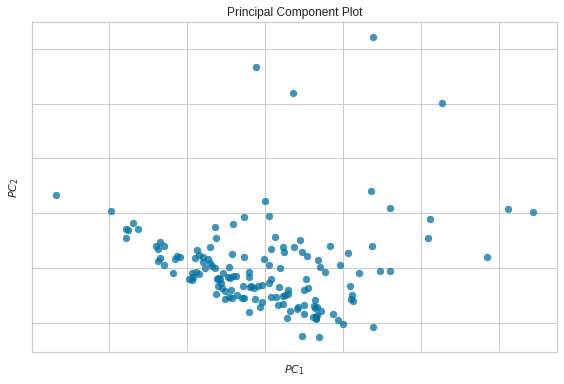

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [15]:
pca_visualizer = PCA(scale=True)
pca_visualizer.fit_transform(features)
pca_visualizer.show()

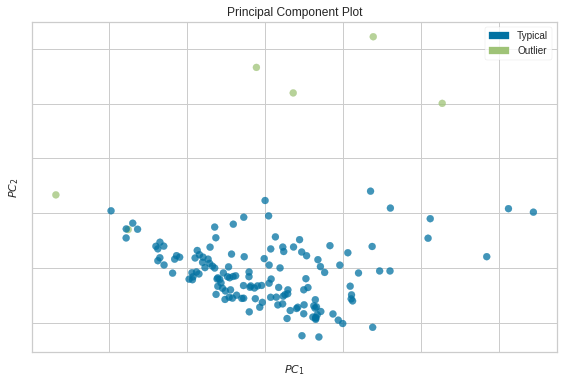

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [16]:
pca_visualizer = PCA(scale=True, classes=labels)
pca_visualizer.fit_transform(features, ground_truth)
pca_visualizer.show()

## Isolation Forests (IFs)

 - Most OD methods rely on a measure of distance
 - Isolation Forests use Extra Random Forest to partition the data
 - Outliers are more likely to be in the minority class of any random split
 - Data points that are consistently isolated near the top of a tree are outliers

![](img/IsolationForest1.png)

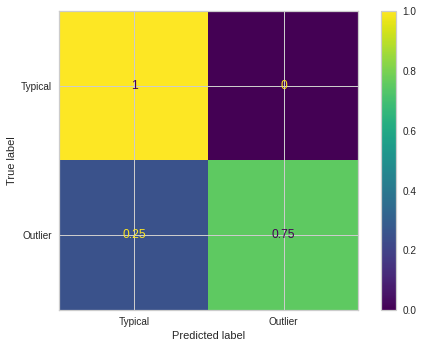

In [17]:
iso_forest = IsolationForest(random_state=1, n_jobs=-1, n_estimators=500, contamination=0.05)
model_prediction = iso_forest.fit_predict(features)
model_prediction = labeler.transform(np.vectorize(lambda x: 0 if x == 1 else 1)(model_prediction))
cm = confusion_matrix(model_prediction, ground_truth, normalize='true')
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

## Explaining Outlier Detection
 - IF works great, but we don't know why an outlier is an outlier
 - Identifying the reason informs your decision to remove a data point from a dataset

## Shapley Values

 - Shapley values measure the marginal contribution of each feature
 - Traditional Shapley values scale fatorially with the number of features (O(N!))
 - Shapley values apply globally

## SHAP Values

 - SHAP (SHapley Additive exPlanations) are Shapley values applied to a machine learning model
 - SHAP takes into account the structure of models for much faster explanations

In [18]:
# Outlier
shap_explainer = shap.Explainer(iso_forest, algorithm='tree', feature_names=feature_labels)
shap_values = shap_explainer(features)
shap.force_plot(shap_values[0])

In [19]:
# Typical
shap.force_plot(shap_values[-1])

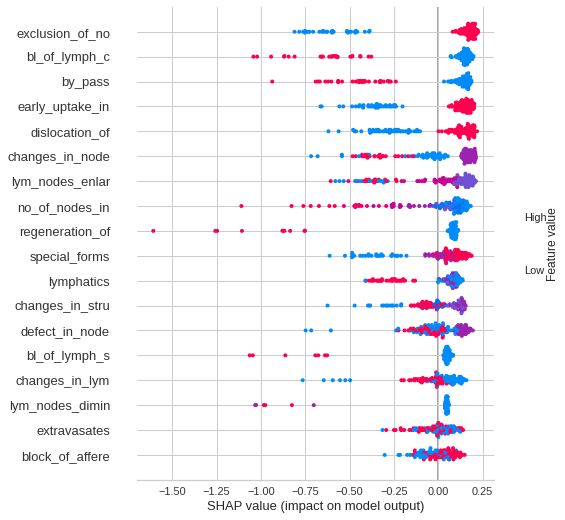

In [20]:
shap.summary_plot(shap_values)

## Bibliography

[1]“2.7. Novelty and Outlier Detection,” scikit-learn. https://scikit-learn/stable/modules/outlier_detection.html (accessed Jan. 03, 2022).
[2]S. Santoyo, “A Brief Overview of Outlier Detection Techniques,” Medium, Nov. 24, 2017. https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561 (accessed Jan. 02, 2022).
[3]“Detecting and preventing abuse on LinkedIn using isolation forests.” https://engineering.linkedin.com/blog/2019/isolation-forest (accessed Jan. 03, 2022).
[4]“Difference between Shapley values and SHAP for interpretable machine learning,” Stack Overflow. https://stackoverflow.com/questions/58203472/difference-between-shapley-values-and-shap-for-interpretable-machine-learning (accessed Jan. 04, 2022).
[5]E. Anello, “Interpretation of Isolation Forest with SHAP,” Medium, Nov. 02, 2021. https://pub.towardsai.net/interpretation-of-isolation-forest-with-shap-d1b6af93ae71 (accessed Dec. 27, 2021).
[6]F. T. Liu, K. M. Ting, and Z.-H. Zhou, “Isolation Forest,” in 2008 Eighth IEEE International Conference on Data Mining, Dec. 2008, pp. 413–422. doi: 10.1109/ICDM.2008.17.
[7]“ODDS – Outlier Detection DataSets.” http://odds.cs.stonybrook.edu/ (accessed Dec. 27, 2021).
[8]R. Sukumar, “SHAP Part 3: Tree SHAP,” Analytics Vidhya, Oct. 21, 2020. https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b (accessed Jan. 04, 2022).
[9]“UCI Machine Learning Repository: Lymphography Data Set.” https://archive.ics.uci.edu/ml/datasets/Lymphography (accessed Jan. 02, 2022).
